# PWV and AOD at LSST site
=========================================

- author Sylvie Dagoret-Campagne
- creation date Thursday April 20th 2017

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
%matplotlib inline

/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/AtmSimForP2IO_2017/radtran_pyscripts/output/afglus/UVSPEC_REPTRAN_SOLAR_ALT26_COARSE_qpwv5_10.out
/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/AtmSimForP2IO_2017/radtran_pyscripts/output/afglus/UVSPEC_REPTRAN_SOLAR_ALT26_COARSE_qpwv95_10.out


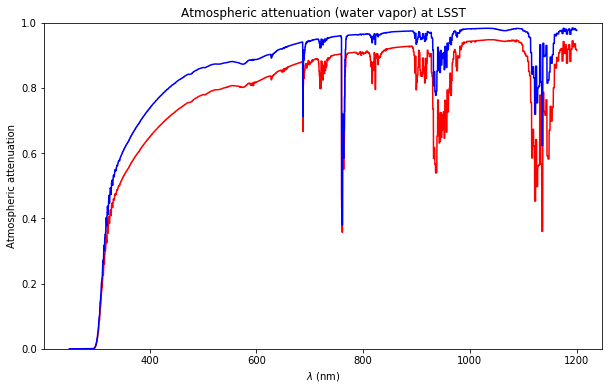

In [11]:
currentpath=os.getcwd()


outpath='output/afglus/'

PWV_quantiles_names = ['qpwv5','qpwv10','qpwv50','qpwv90','qpwv95']   # percentages of the quantiles
PWV_quantiles_values= [1.184,1.1472,2.699,4.676,5.216]

fig1 = plt.figure(figsize=(10,6))

filename0='UVSPEC_REPTRAN_SOLAR_ALT26_COARSE_qpwv5_10.out'
fullpath0=os.path.join(currentpath,outpath)
fullfilename0=os.path.join(fullpath0,filename0)
print fullfilename0
array0=np.loadtxt(fullfilename0)
wlsize=array0.shape[0]
x0=array0[:,0]
y0=array0[:,1]

filename1='UVSPEC_REPTRAN_SOLAR_ALT26_COARSE_qpwv95_10.out'
fullpath1=os.path.join(currentpath,outpath)
fullfilename1=os.path.join(fullpath1,filename1)
print fullfilename1
array1=np.loadtxt(fullfilename1)
wlsize=array1.shape[0]
x1=array1[:,0]
y1=array1[:,1]
plt.plot(x1, y1,'r-')
plt.plot(x0, y0,'b-')
plt.ylim([0., 1])
plt.xlabel('$\lambda$ (nm)')
plt.ylabel('Atmospheric attenuation')
plt.title('Atmospheric attenuation (water vapor) at LSST')
plt.legend(loc='best')

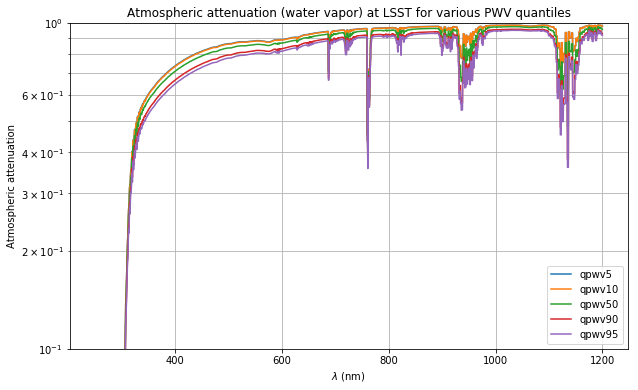

In [12]:
fig1 = plt.figure(figsize=(10,6))
for quantile in PWV_quantiles_names:
    filename='UVSPEC_REPTRAN_SOLAR_ALT26_COARSE_'+quantile+'_10.out'
    fullpath=os.path.join(currentpath,outpath)
    fullfilename=os.path.join(fullpath,filename)
    array=np.loadtxt(fullfilename)
    x=array[:,0]
    y=array[:,1]    
    plt.semilogy(x, y,'-',label=quantile)

plt.ylim([0.1, 1.])
plt.tick_params(axis='y', which='minor')
plt.grid(True,which='both')
plt.xlabel('$\lambda$ (nm)')
plt.ylabel('Atmospheric attenuation')
plt.title('Atmospheric attenuation (water vapor) at LSST for various PWV quantiles')
plt.legend(loc='best')
plt.savefig('LSSTPWVAttenuation.pdf',bbox_inches='tight')

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in divide


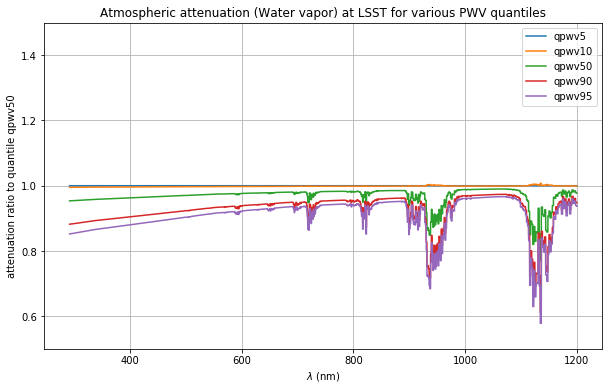

In [13]:
fig1 = plt.figure(figsize=(10,6))
for quantile in PWV_quantiles_names:
    filename='UVSPEC_REPTRAN_SOLAR_ALT26_COARSE_'+quantile+'_10.out'
    fullpath=os.path.join(currentpath,outpath)
    fullfilename=os.path.join(fullpath,filename)
    array=np.loadtxt(fullfilename)
    x=array[:,0]
    y=array[:,1]
    ratio=y/y0
    plt.plot(x, ratio,'-',label=quantile)

plt.ylim([0.5, 1.5])
plt.tick_params(axis='y', which='minor')
plt.grid(True,which='both')
#plt.grid(True)
plt.xlabel('$\lambda$ (nm)')
plt.ylabel('attenuation ratio to quantile qpwv50')
plt.title('Atmospheric attenuation (Water vapor) at LSST for various PWV quantiles')
plt.legend(loc='best')
plt.savefig('LSSTPWVAttenuationratio.pdf',bbox_inches='tight')